<a href="https://colab.research.google.com/github/veenath09/Machine-Learning/blob/main/mlp_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [43]:
print(type(data))
print(data.dtypes)


<class 'pandas.core.frame.DataFrame'>
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [44]:
data.sum()

,0
Pregnancies,2953.000
Glucose,92847.000
BloodPressure,53073.000
SkinThickness,15772.000
Insulin,61286.000
BMI,24570.300
DiabetesPedigreeFunction,362.401
Age,25529.000
Outcome,268.000


In [45]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
scaler = StandardScaler()


In [47]:
y = data['Outcome']
x = data.drop(columns=['Outcome'])

In [48]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [49]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [64]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.1 , random_state = 45)

In [65]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

In [66]:
x_test

,0,1,2,3,4,5,6,7
0,0.333163,1.164922,0.762700,1.266552,1.113670,0.939765,-0.235931,-0.357001
1,-0.844410,-0.643694,-0.996985,-0.362636,-0.387496,-0.995256,0.163678,-0.613699
2,-1.138803,-0.389853,0.969722,0.577280,-0.698082,0.061368,1.167278,0.413096
3,0.333163,0.815891,0.296901,-1.302552,-0.698082,-0.269623,-0.116964,-0.442567
4,-0.844410,-0.294663,0.555678,1.517196,0.440734,0.354167,-0.778912,-0.784832
...,...,...,...,...,...,...,...,...
72,-0.550017,-1.183106,-3.584757,-1.302552,-0.698082,-4.076012,-0.513523,-1.041531
73,-1.138803,-0.072552,-0.168898,0.389297,-0.698082,0.863383,-0.650793,-0.955964
74,-0.550017,-1.278296,0.141635,-0.362636,-0.042400,-0.244162,0.227738,-0.699266
75,-0.550017,-1.024455,1.073233,0.577280,-0.698082,0.188672,-0.550128,0.755360


In [72]:
x_train.shape[1]

8

In [67]:
model = keras.Sequential()


In [80]:

model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [83]:
optimzer = keras.optimizers.Adam



model.compile(optimizer = optimzer(learning_rate=0.001),loss = keras.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [95]:
model.fit(x_train,y_train,batch_size=16,epochs=250,verbose=True,validation_split=0.2)

Epoch 1/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7749 - loss: 0.4574 - val_accuracy: 0.7770 - val_loss: 0.4071
Epoch 2/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7845 - loss: 0.4708 - val_accuracy: 0.7770 - val_loss: 0.4066
Epoch 3/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8079 - loss: 0.4238 - val_accuracy: 0.7770 - val_loss: 0.4076
Epoch 4/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8252 - loss: 0.4035 - val_accuracy: 0.7770 - val_loss: 0.4063
Epoch 5/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8010 - loss: 0.4254 - val_accuracy: 0.7770 - val_loss: 0.4057
Epoch 6/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8121 - loss: 0.4245 - val_accuracy: 0.7770 - val_loss: 0.4081
Epoch 7/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7961 - loss: 0.4211 - val_accuracy: 0.7770 - val_loss: 0.4059
Epoch 8/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7866 - loss: 0.4371 - val_accuracy: 0.7770 - v

In [109]:
from sklearn.metrics import f1_score

In [122]:
y_pred = (model.predict(x_test)>0.5).astype(int)
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [117]:
y_pred = [1 if val > 0.5 else 0 for val in y_pred]
y_pred

[1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [118]:
y_pred1 = y_pred.reshape(-1,)
y_pred1.shape

AttributeError: 'list' object has no attribute 'reshape'

In [123]:
f1 = f1_score(y_test,y_pred)

In [124]:
f1

0.6153846153846154

In [125]:
print(f"Test F1 Score: {f1:.4f}")


Test F1 Score: 0.6154


In [126]:
from sklearn.metrics import confusion_matrix , precision_score , recall_score

cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  8],
       [12, 16]])

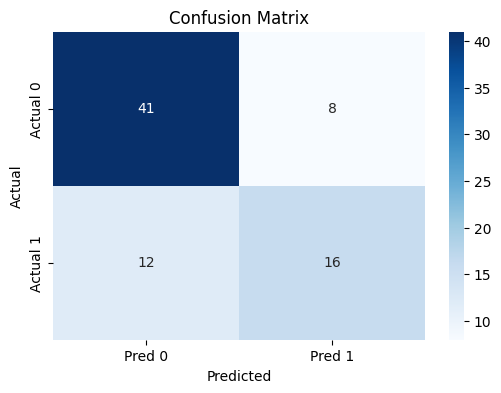

In [129]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()